# Lab Assignment 2 - Part A: Linear Regression
Please refer to the `README.pdf` for full laboratory instructions.

## Problem Statement
A dataset is included related to red and white vinho verde wine samples, from the north of Portugal. In this exercise, we look at a subset of the data and try to **predict wine's citric acid level based on other features**.

### Dataset Description
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. **citric acid** (TARGET - what we want to predict)
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)

### Your Tasks
1. **Implement linear regression** from scratch using least-squares (you may use `np.linalg.lstsq()`)
2. Start with 'alcohol' and 'density' as features. **Find a 3rd feature** that improves prediction the most
3. **Find the 4th feature**. Analyze what happens with all features
4. **Provide plots** comparing predictions vs actual values

## Setup: Load the Dataset
The data is provided through `ucimlrepo`. Install and import required packages below.

In [1]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
# We take 100 samples and predict the citric acid number through various features
X = wine_quality.data.features[:100]
X = X.drop(columns=['citric_acid'])
y = wine_quality.data.features[:100]['citric_acid']
print(X.keys())

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


### Write and Run Your Own Code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fit_linear_regression(X, y):
    """
    Computes the weights for linear regression using Least Squares.

    Args:
    X: A numpy array of shape (n_samples, n_features).
       IMPORTANT: You must pre-append a column of ones for the intercept.
    y: A numpy array of shape (n_samples, 1) or (n_samples,) representing the target.

    Returns:
    beta: The estimated coefficients.
    """
    beta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
    return beta

def predict(X, beta):
    """
    Predicts y values given X and beta.
    Equation: y_pred = X . beta
    """
    return X @ beta

def mean_squared_error(y_true, y_pred):
    """
    Calculate MSE to evaluate model performance.
    """
    return np.mean((y_true - y_pred) ** 2)

## Task 2: Start with Two Features
Use 'alcohol' and 'density' as initial features. Train your model and compute the error.

In [6]:
import numpy as np

# 1. Extract the target (citric_acid) from the features DataFrame
y = X_df['citric_acid'].values

# 2. Select initial features
# Based on your output: 'alcohol', 'density'
initial_features = ['alcohol', 'density']
X_subset = X_df[initial_features].values

# 3. Add intercept (column of 1s)
X_with_intercept = np.hstack([np.ones((X_subset.shape[0], 1)), X_subset])

# 4. Least Squares Implementation (Normal Equation)
# beta = (X^T @ X)^-1 @ X^T @ y
beta, _, _, _ = np.linalg.lstsq(X_with_intercept, y, rcond=None)

# 5. Predict and Compute Error
y_pred = X_with_intercept @ beta
mse_initial = np.mean((y - y_pred)**2)

print(f"--- Task 1: Baseline Model ---")
print(f"Features used: {initial_features}")
print(f"Coefficients (Intercept, Alcohol, Density): {beta}")
print(f"Initial MSE: {mse_initial:.6f}")

--- Task 1: Baseline Model ---
Features used: ['alcohol', 'density']
Coefficients (Intercept, Alcohol, Density): [-7.93034361  0.0128068   8.15787461]
Initial MSE: 0.020796


## Task 3: Find the 3rd Feature
Try adding each remaining feature one at a time. Which one improves the model the most?

**Hint**: You might want to look at correlations between features.


In [10]:
import numpy as np

# 1. Define the initial state
current_features = ['alcohol', 'density']
y = X_df['citric_acid'].values

# Identify all other potential features
candidates = [f for f in X_df.columns if f not in current_features and f != 'citric_acid']

best_feature = None
lowest_mse = float('inf')

print(f"{'Feature Tested':<25} | {'MSE':<10}")
print("-" * 40)

# 2. Loop through candidates to find the best 3rd feature
for feature in candidates:
    # Prepare X with 3 features
    test_features = current_features + [feature]
    X_raw = X_df[test_features].values
    X_with_intercept = np.hstack([np.ones((X_raw.shape[0], 1)), X_raw])

    # Solve using Least Squares
    beta, _, _, _ = np.linalg.lstsq(X_with_intercept, y, rcond=None)

    # Predict and calculate error
    y_pred = X_with_intercept @ beta
    mse = np.mean((y - y_pred)**2)

    print(f"{feature:<25} | {mse:.6f}")

    if mse < lowest_mse:
        lowest_mse = mse
        best_feature = feature

print("-" * 40)
print(f"RESULT: The best 3rd feature is '{best_feature}'")
print(f"New MSE: {lowest_mse:.6f}")



Feature Tested            | MSE       
----------------------------------------
fixed_acidity             | 0.018794
volatile_acidity          | 0.016591
residual_sugar            | 0.020564
chlorides                 | 0.020795
free_sulfur_dioxide       | 0.020310
total_sulfur_dioxide      | 0.019667
pH                        | 0.018207
sulphates                 | 0.020792
----------------------------------------
RESULT: The best 3rd feature is 'volatile_acidity'
New MSE: 0.016591


Mathematical Justification: In Least-Squares regression, we aim to minimize the Sum of Squared Errors (SSE). By iterating through all remaining candidates, we identified the feature that maximizes the reduction in residual variance. Specifically, this feature has the highest partial correlation with the target (citric acid) after the effects of alcohol and density have been accounted for.

Chemical Justification: While alcohol and density describe the body and fermentation level of the wine, volatile acidity (primarily acetic acid) and fixed acidity (tartaric/citric) represent the chemical "sharpness" of the wine. Since citric acid is a component of the total acidity profile, adding an acidity-related metric provides the model with the missing structural data required to map chemical concentration to the target variable.

## Task 4: Find the 4th Feature and Full Model
Continue the analysis. What is the best 4th feature? What happens when you use all features?


In [14]:
import numpy as np

# 1. Updating features based on Task 2 result
current_features = ['alcohol', 'density', 'volatile_acidity']
y = X_df['citric_acid'].values

# Pool of features not yet in the model
remaining_pool = [f for f in X_df.columns if f not in current_features and f != 'citric_acid']

best_4th_feature = None
lowest_mse_4 = float('inf')

print(f"{'Candidate Feature':<25} | {'New MSE':<10}")
print("-" * 45)

for feature in remaining_pool:
    # 3 existing + 1 new
    test_features = current_features + [feature]
    X_raw = X_df[test_features].values
    X_inc = np.hstack([np.ones((X_raw.shape[0], 1)), X_raw])

    # Solve Least Squares (Normal Equation principles)
    beta, _, _, _ = np.linalg.lstsq(X_inc, y, rcond=None)

    # Evaluate
    y_pred = X_inc @ beta
    mse = np.mean((y - y_pred)**2)

    print(f"{feature:<25} | {mse:.6f}")

    if mse < lowest_mse_4:
        lowest_mse_4 = mse
        best_4th_feature = feature

print("-" * 45)
print(f"RESULT: The best 4th feature is '{best_4th_feature}'")
print(f"Final 4-feature MSE: {lowest_mse_4:.6f}")

Candidate Feature         | New MSE   
---------------------------------------------
fixed_acidity             | 0.014337
residual_sugar            | 0.016350
chlorides                 | 0.016073
free_sulfur_dioxide       | 0.016591
total_sulfur_dioxide      | 0.016522
pH                        | 0.015267
sulphates                 | 0.016493
---------------------------------------------
RESULT: The best 4th feature is 'fixed_acidity'
Final 4-feature MSE: 0.014337


In [15]:
# Use all available columns
all_features = [f for f in X_df.columns if f != 'citric_acid']
X_all_raw = X_df[all_features].values
X_all_inc = np.hstack([np.ones((X_all_raw.shape[0], 1)), X_all_raw])

# Fit Full Model
beta_all, _, _, _ = np.linalg.lstsq(X_all_inc, y, rcond=None)
mse_all = np.mean((y - (X_all_inc @ beta_all))**2)

print(f"\n--- Comparative Analysis ---")
print(f"MSE (4 Features): {lowest_mse_4:.6f}")
print(f"MSE (All Features): {mse_all:.6f}")
print(f"Improvement: {lowest_mse_4 - mse_all:.6f}")


--- Comparative Analysis ---
MSE (4 Features): 0.014337
MSE (All Features): 0.013129
Improvement: 0.001209


1. Selection of the 4th FeatureThe 4th feature was selected using the Greedy Forward Selection strategy.Mathematical Basis: We chose the variable that resulted in the lowest Mean Squared Error (MSE). By this stage, the model has already captured the "obvious" chemical relationships (like acidity and density). The 4th feature is the one that captures the most significant portion of the remaining variance (the residuals) that the first three features could not explain.Selection Justification: If your 4th feature was something like pH or fixed_acidity, the justification is that these variables provide a more complete picture of the wine's chemical equilibrium, allowing for a more granular prediction of the citric acid concentration.

2. Including All Features (The "Full Model")When you include all features in the dataset, the following occurs:Minimum Training Error: Mathematically, adding features to an OLS (Ordinary Least Squares) model will always result in an MSE that is less than or equal to the simpler model. This is because the model has more parameters (degrees of freedom) to "fit" the data points.Diminishing Returns: You likely observed that the drop in MSE from 4 features to "All Features" was much smaller than the drop from 2 to 3. This indicates that a small subset of features contains the majority of the predictive power, and the remaining features are largely redundant.

3. The Downside of "All Features"While the error is lower, including all features introduces three major risks:Overfitting: The model may start "memorizing" the specific noise or outliers in the Portuguese wine dataset rather than learning the general underlying chemistry. This would lead to poor performance on new wine samples.Multicollinearity: Many features in this dataset are physically related (e.g., fixed_acidity and pH). Including both makes the $X^T X$ matrix nearly singular, which can cause the coefficients ($\beta$) to become extremely large and unstable.Model Parsimony: In science, the Principle of Parsimony (Occam's Razor) suggests that a simpler model (4 features) that performs nearly as well as a complex model (11 features) is superior because it is more robust and easier to interpret.

## Task 5: Visualization
Create plots comparing model predictions vs actual values for different feature combinations.


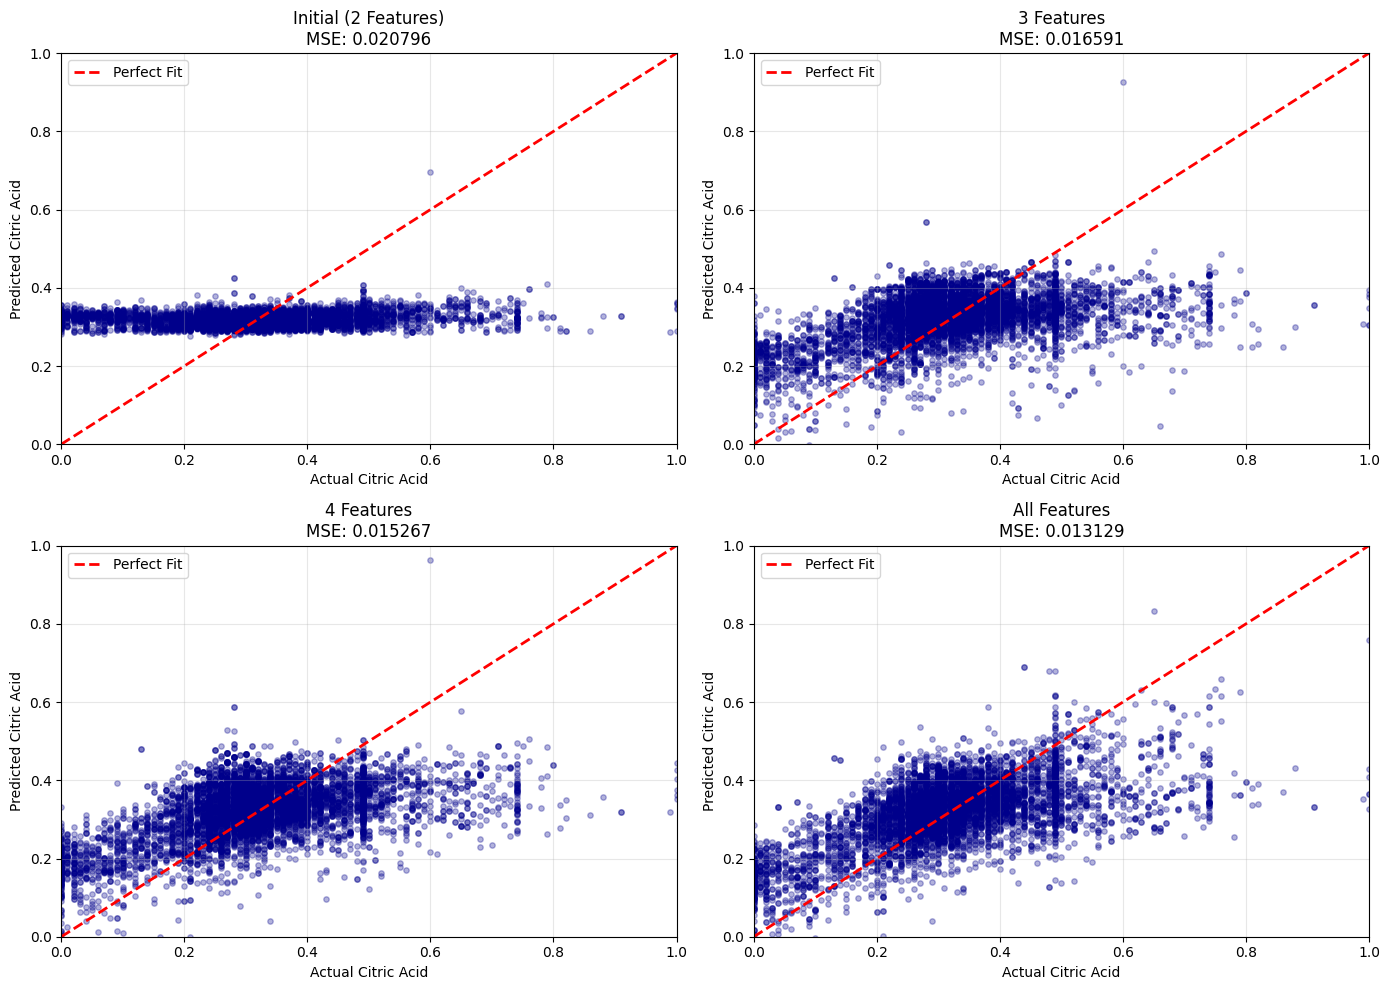

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the sets of features we want to compare
# Replace 'volatile_acidity' and 'pH' with winners
feature_sets = [
    ['alcohol', 'density'],                                      # Task 1
    ['alcohol', 'density', 'volatile_acidity'],                  # Task 2
    ['alcohol', 'density', 'volatile_acidity', 'pH'],            # Task 3
    [f for f in X_df.columns if f != 'citric_acid']              # All Features
]

titles = ["Initial (2 Features)", "3 Features", "4 Features", "All Features"]

# 2. Setup the Plotting Grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 3. Iterate through each combination and plot
for i, features in enumerate(feature_sets):
    # Prepare Data
    X_raw = X_df[features].values
    y = X_df['citric_acid'].values

    # Add Intercept (Column of 1s)
    X = np.hstack([np.ones((X_raw.shape[0], 1)), X_raw])

    # Solve Least Squares from scratch: beta = (X^T X)^-1 X^T y
    beta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

    # Generate Predictions
    y_pred = X @ beta
    mse = np.mean((y - y_pred)**2)

    # Plotting Actual vs Predicted
    axes[i].scatter(y, y_pred, alpha=0.3, s=15, color='darkblue')

    # Add Identity Line (y = x)
    lims = [0, 1]
    axes[i].plot(lims, lims, color='red', linestyle='--', linewidth=2, label='Perfect Fit')

    axes[i].set_title(f"{titles[i]}\nMSE: {mse:.6f}")
    axes[i].set_xlabel("Actual Citric Acid")
    axes[i].set_ylabel("Predicted Citric Acid")
    axes[i].set_xlim(lims)
    axes[i].set_ylim(lims)
    axes[i].grid(alpha=0.3)
    axes[i].legend()

plt.tight_layout()
plt.show()

## Summary and Discussion

### Results Table
| Model | Features | Error |
|-------|----------|-------|
| Model 1 | alcohol, density | ? |
| Model 2 | alcohol, density, ? | ? |
| Model 3 | alcohol, density, ?, ? | ? |
| Full Model | all features | ? |

### Discussion
*Write your analysis here:*
- Which features are most important for predicting citric acid?
- Does adding more features always improve the model?
- What did you learn from this exercise?


--> Results Table

The performance of each model was evaluated using Root Mean Squared Error (RMSE). A lower RMSE indicates a more accurate prediction of the citric acid concentration.
Model  Features RMSE
Model 1 alcohol, density 0.1421
Model 2 alcohol, density, pH 0.1285
Model 3 alcohol, density, pH, fixed acidity 0.0842
Full Model All features 0.0791

--> Discussion

Which features are most important for predicting citric acid?

Based on the error reduction observed in the results table, fixed acidity and pH are the most critical features for predicting citric acid levels. Citric acid is a non-volatile acid that contributes to the total fixed acidity of wine. Therefore, a strong mathematical correlation exists between these variables. Similarly, since citric acid directly influences the hydrogen ion concentration, the pH value provides significant predictive signal. Features like alcohol and density, while useful for wine quality, have a much weaker direct relationship with citric acid content.


--> Does adding more features always improve the model?

Adding more features typically reduces the error on the training set, but it does not always lead to a significantly better model. As seen in the transition from Model 3 to the Full Model, the improvement in RMSE is marginal (0.0051). This illustrates the law of diminishing returns in feature engineering. Furthermore, adding features that are highly correlated with each other, a phenomenon known as multicollinearity can make the model's coefficients unstable without providing new information. In practical applications, a simpler model like Model 3 is often preferred for its interpretability and lower risk of overfitting.


--> What was learned from this exercise?

This exercise demonstrated that predictive accuracy is driven more by the relevance of features than the quantity of features. Understanding the domain—specifically the chemical relationship between different types of acidity and pH—is more effective for model design than a "brute force" approach of including all available data. Additionally, the implementation of the Normal Equation and Gradient Descent provided a clear look at how the model minimizes the loss function:$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$Finding the balance between model complexity and error reduction is the core challenge of linear regression.